In [1]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
movies_df = pd.read_csv("data/movies_metadata.csv")
ratings_df = pd.read_csv("data/ratings.csv")

/var/folders/gh/zfs73sfd0g98hhvh3pghq3w80000gn/T/ipykernel_94974/3102374186.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("data/movies_metadata.csv")


In [3]:
movies_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [5]:
print("Number of users", len(ratings_df["userId"].unique()))
print("Number of movies", len(ratings_df["movieId"].unique()))

Number of users 270896
Number of movies 45115


In [6]:
ratings_df["rating"].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [7]:
mean_ratings_df = ratings_df.groupby("userId").mean()[["rating"]].rename(columns={ "rating": "mean_rating" })

In [8]:
mean_ratings_df

,mean_rating
userId,
1,4.277778
2,3.318182
3,3.100000
4,3.500000
5,4.269231
...,...
270892,3.640000
270893,3.673684
270894,2.516892


In [9]:
ratings_df = ratings_df.join(mean_ratings_df, on="userId", validate="m:1")

In [10]:
ratings_df["adjusted_rating"] = ratings_df["rating"] - ratings_df["mean_rating"]

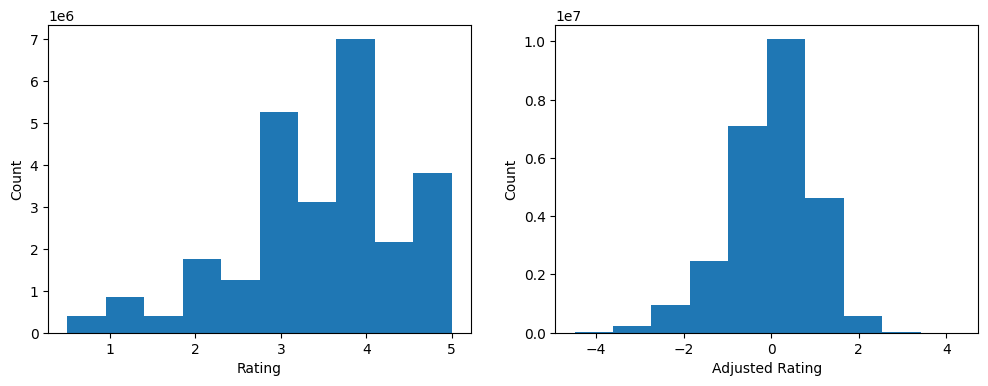

In [11]:
# plot distribution of ratings, both original and adjusted
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax = plt.subplot(1, 2, 1)
plt.hist(ratings_df["rating"], bins=10)
plt.xlabel("Rating")
plt.ylabel("Count")

ax = plt.subplot(1, 2, 2)
plt.hist(ratings_df["adjusted_rating"], bins=10)
plt.xlabel("Adjusted Rating")
plt.ylabel("Count")

plt.savefig("images/ratings_distribution.jpg")

In [12]:
ratings_count_by_user = ratings_df.groupby("userId").count()[["rating"]].rename(columns={ "rating": "count" })

In [13]:
counts = [10, 20, 50, 100, 200, 500, 1000]

for count in counts:
    print(f"No. of users with >= {count} ratings:", len(ratings_count_by_user[ratings_count_by_user["count"] >= count]))

No. of users with >= 10 ratings: 233903
No. of users with >= 20 ratings: 166444
No. of users with >= 50 ratings: 103839
No. of users with >= 100 ratings: 64433
No. of users with >= 200 ratings: 33087
No. of users with >= 500 ratings: 9516
No. of users with >= 1000 ratings: 2509


In [14]:
# function to determine the frequency of categories for a categorical attribute
def process_frequency(row, column, freq_dict):
    objects = ast.literal_eval(row[column])
    for obj in objects:
        name = obj["name"]
        if name not in freq_dict:
            freq_dict[name] = 0
        freq_dict[name] += 1

In [15]:
genre_freq = {} 
movies_df.apply(process_frequency, axis=1, args=("genres", genre_freq));

In [16]:
# drop genres without only 1 movie (to make pie chart more readable)
agg_genre_freq = {}

for key, value in genre_freq.items():
    if value != 1:
        agg_genre_freq[key] = value

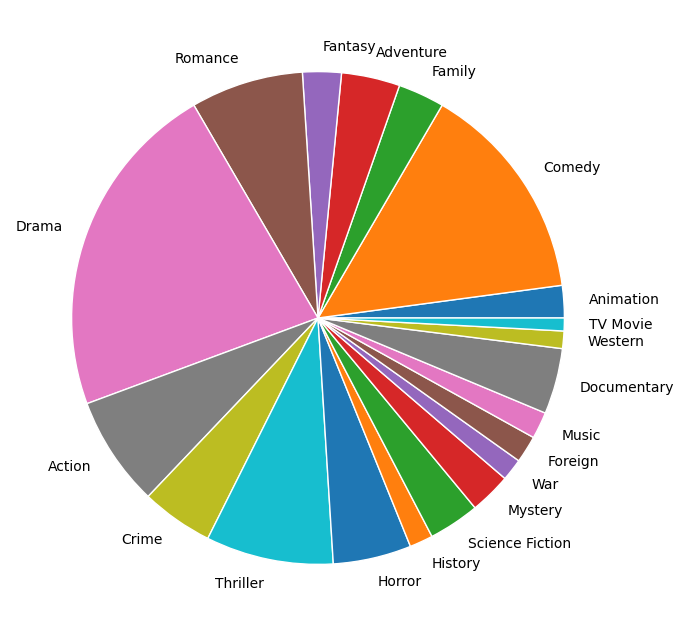

In [17]:
# plot pie chart of genres
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(agg_genre_freq.values(), labels=agg_genre_freq.keys(), wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.savefig("images/genre_distribution.jpg")

In [18]:
# fill in N/A values with empty strings
movies_df["overview"] = movies_df["overview"].fillna("") 

# compute TFIDF matrix for movie overviews 
vectorizer = TfidfVectorizer(analyzer="word", stop_words="english")
matrix = vectorizer.fit_transform(movies_df["overview"])

In [19]:
tokens = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(data=matrix.toarray(), index=movies_df["id"], columns=tokens)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


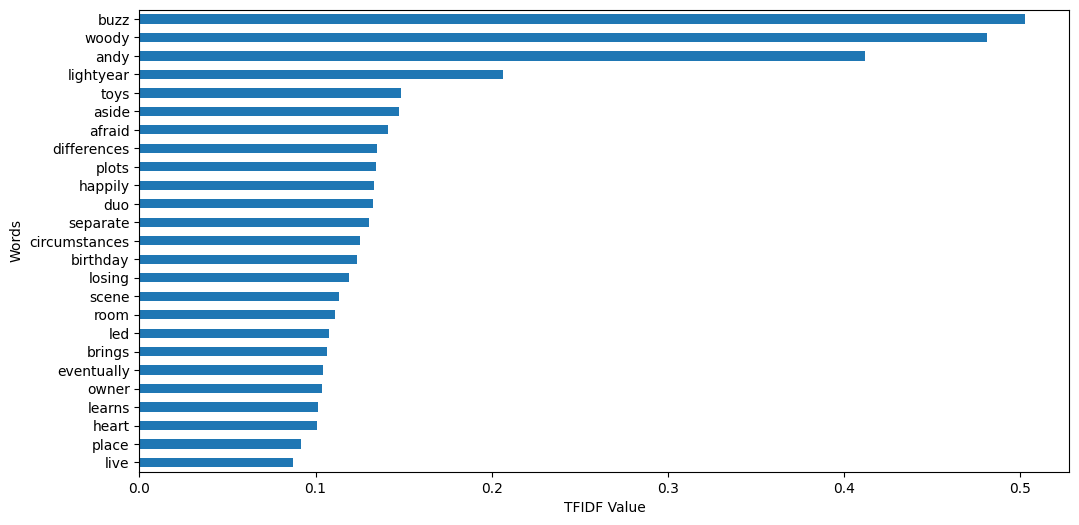

In [20]:
# plot tfidf vectorization results for example ("Toy Story")
fig, ax = plt.subplots(figsize=(12, 6))
tfidf_df.loc["862", :].sort_values(ascending=False)[:25].plot.barh()
plt.xlabel("TFIDF Value")
plt.ylabel("Words")
ax.invert_yaxis()
plt.savefig("images/example_tfidf.jpg")